In [191]:
import pandas as pd
import numpy as np
import os
import librosa
import seaborn as sb
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [204]:
paths = []
labels = []
import os
os.chdir("sounds")
for dirname, dirs, filename in os.walk(".", topdown=False):
   for name in filename:
      label = name.split('_')[-1].split('.')[0]
      if label!='test' :
         labels.append(label)
         paths.append(os.path.join(dirname, name))

In [205]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [206]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,.\OAF_angry\OAF_back_angry.wav,angry
1,.\OAF_angry\OAF_bar_angry.wav,angry
2,.\OAF_angry\OAF_base_angry.wav,angry
3,.\OAF_angry\OAF_bath_angry.wav,angry
4,.\OAF_angry\OAF_bean_angry.wav,angry


In [207]:
df.shape

(2800, 2)

In [208]:
df.tail

<bound method NDFrame.tail of                               speech  label
0     .\OAF_angry\OAF_back_angry.wav  angry
1      .\OAF_angry\OAF_bar_angry.wav  angry
2     .\OAF_angry\OAF_base_angry.wav  angry
3     .\OAF_angry\OAF_bath_angry.wav  angry
4     .\OAF_angry\OAF_bean_angry.wav  angry
...                              ...    ...
2795     .\YAF_sad\YAF_witch_sad.wav    sad
2796     .\YAF_sad\YAF_yearn_sad.wav    sad
2797       .\YAF_sad\YAF_yes_sad.wav    sad
2798     .\YAF_sad\YAF_young_sad.wav    sad
2799     .\YAF_sad\YAF_youth_sad.wav    sad

[2800 rows x 2 columns]>

In [7]:
df.shape

(2800, 2)

In [8]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

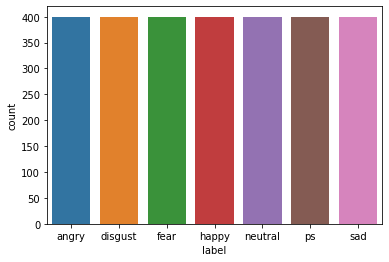

In [9]:
sb.countplot(df['label'])

## Show SPECTROGRAM AND WAVEPLOT

In [10]:
def waveplot(data ,sr ,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectrogram(data ,sr ,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()


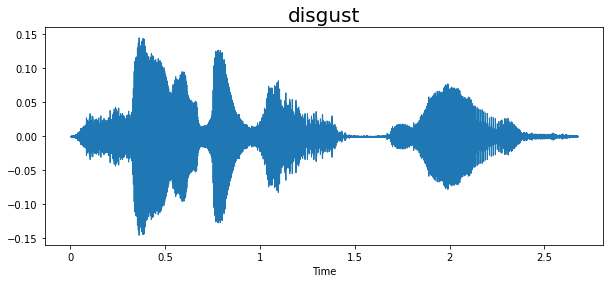

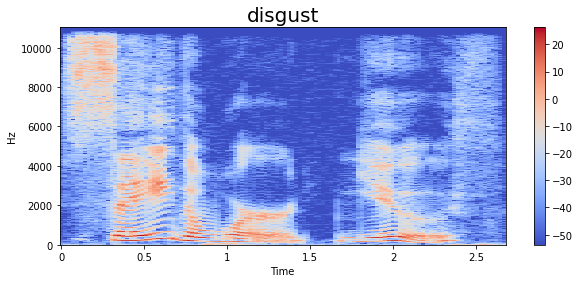

In [11]:
emotion = 'disgust' #change emotion to other types
path = list(df['speech'][df['label']==emotion])[399]
data,sr = librosa.load(path)
waveplot(data ,sr ,emotion)
spectrogram(data ,sr ,emotion)
Audio(path)

## FEATURE EXTRACTION

In [189]:
def extract(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [142]:
extract(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [190]:
x_mfcc = df['speech'].apply(lambda x: extract(x))

In [15]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54757, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [130]:
x = [i for i in x_mfcc]
x = np.array(x)
x.shape

(2800, 40)

need 3d array to put into LSTM model

In [103]:
x = np.expand_dims(x,-1)

In [104]:
x.shape

(2800, 40, 1)

In [105]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [106]:
y = enc.fit_transform(df[['label']])
y

<2800x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2800 stored elements in Compressed Sparse Row format>

In [107]:
y = y.toarray()

## LSTM Model

In [108]:
import tensorflow as tf

In [109]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dropout

In [110]:
from tensorflow.python.keras.models import Sequential

In [111]:
model = Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 123)               61500     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                7936      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 231       
Total params: 71,747
Trainable params: 71,747
Non-trainable params: 0
__________________________________________________

## Training

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,stratify=y,random_state=43)

In [115]:
hist = model.fit(x_train,y_train,validation_split=0.2,epochs=100,batch_size=256,shuffle=True)

Epoch 1/100
7/7 [==============================] - 1s 96ms/step - loss: 0.0306 - accuracy: 0.9916 - val_loss: 0.1713 - val_accuracy: 0.9710
Epoch 2/100
7/7 [==============================] - 1s 98ms/step - loss: 0.0352 - accuracy: 0.9877 - val_loss: 0.1035 - val_accuracy: 0.9732
Epoch 3/100
7/7 [==============================] - 1s 103ms/step - loss: 0.0368 - accuracy: 0.9900 - val_loss: 0.1571 - val_accuracy: 0.9732
Epoch 4/100
7/7 [==============================] - 1s 99ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.1260 - val_accuracy: 0.9665
Epoch 5/100
7/7 [==============================] - 1s 99ms/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.2124 - val_accuracy: 0.9576
Epoch 6/100
7/7 [==============================] - 1s 104ms/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0950 - val_accuracy: 0.9754
Epoch 7/100
7/7 [==============================] - 1s 99ms/step - loss: 0.0463 - accuracy: 0.9883 - val_loss: 0.1639 - val_accuracy: 0.9598
Epoch 8/100
7/7 [=

## MODEL TRAINED
TEST OUT LIKE ANY OTHER MODEL

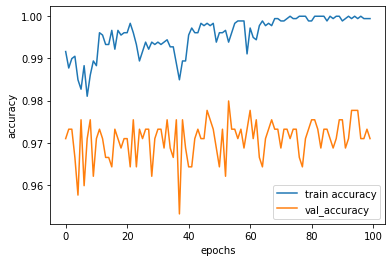

In [188]:
epochs = range(100)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [117]:
from sklearn.metrics import accuracy_score
test_pred = model.predict(x_test)
test_pred.shape

(560, 7)

In [118]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [119]:
x_test.shape

(560, 40, 1)

In [120]:
test_pred[0]

array([5.7694518e-07, 4.3489590e-07, 1.4786256e-06, 1.4605610e-05,
       2.2923960e-07, 9.9998271e-01, 1.4896797e-08], dtype=float32)

In [123]:
def sparser(arr):
    for i in arr:
        a=max(i)
        b = np.where(i==a)[0]
        for j in range(len(i)):
            i[j]=0
        i[b[0]]=1
    return arr
        

y_pred = sparser(test_pred)

In [124]:
y_pred

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [125]:
test_accuracy = accuracy_score(y_pred,y_test)
test_accuracy*100

98.39285714285714

In [133]:
X=x

In [165]:
test = '.\OAF_angry\OAF_back_angry.wav'
test = extract(test)

In [166]:
test

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [167]:
test.shape

(40,)

In [168]:
test = [[i for i in test]]

In [169]:
test = np.array(test)

In [170]:
test = np.expand_dims(test,-1)

In [171]:
test.shape

(1, 40, 1)

In [172]:
res = model.predict(test)

In [180]:
print(sparser(res))

[[1. 0. 0. 0. 0. 0. 0.]]


In [187]:
emots = ['anger','disgust','fear','happiness','neutral','ps','sad']

for i in res:
    b = np.where(i==1)[0]
    print("emotion is:",emots[b[0]])

emotion is: anger
